# CS60050_Machine Learning_Programming Assignment_3
> ### Part B: K-Means Clustering - Anuran Calls Dataset (MFCCs)

## 1. Data Preprocessing and Exploration

Gathering all the libraries used

In [1]:
import kagglehub
import os
import shutil
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score


### Load Dataset

In [2]:
! pip install kagglehub
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

cp: kaggle.json: No such file or directory


In [3]:
if os.path.exists('./Frogs_MFCCs.csv'):
    print("Dataset already downloaded")
else:
    path= kagglehub.dataset_download("yasserhessein/anuran-calls-mfccs")
    print("Path to dataset files:", path)

Path to dataset files: /Users/chandranshsingh/.cache/kagglehub/datasets/yasserhessein/anuran-calls-mfccs/versions/2


In [9]:
if os.path.exists('./Frogs_MFCCs.csv'):
    print("File already exists in the current directory")
else:
    print("File does not exist in the current directory")
    source_path = f"{path}/Frogs_MFCCs.csv"
    destination_path = './Frogs_MFCCs.csv'

    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)
        print(f"Moved {source_path} to {destination_path}")
    else:
        print(f"File not found: {source_path}")

File already exists in the current directory


### Performing Exploratory Data Analysis (EDA)

 Load the dataset

In [10]:
df = pd.read_csv('./Frogs_MFCCs.csv')
print(df.shape)
df.head()

(7195, 26)


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [12]:
df.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


In [13]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64


> we notice that there are no null values

### Normalization
* we normalize the data to bing all the values between [0,1]


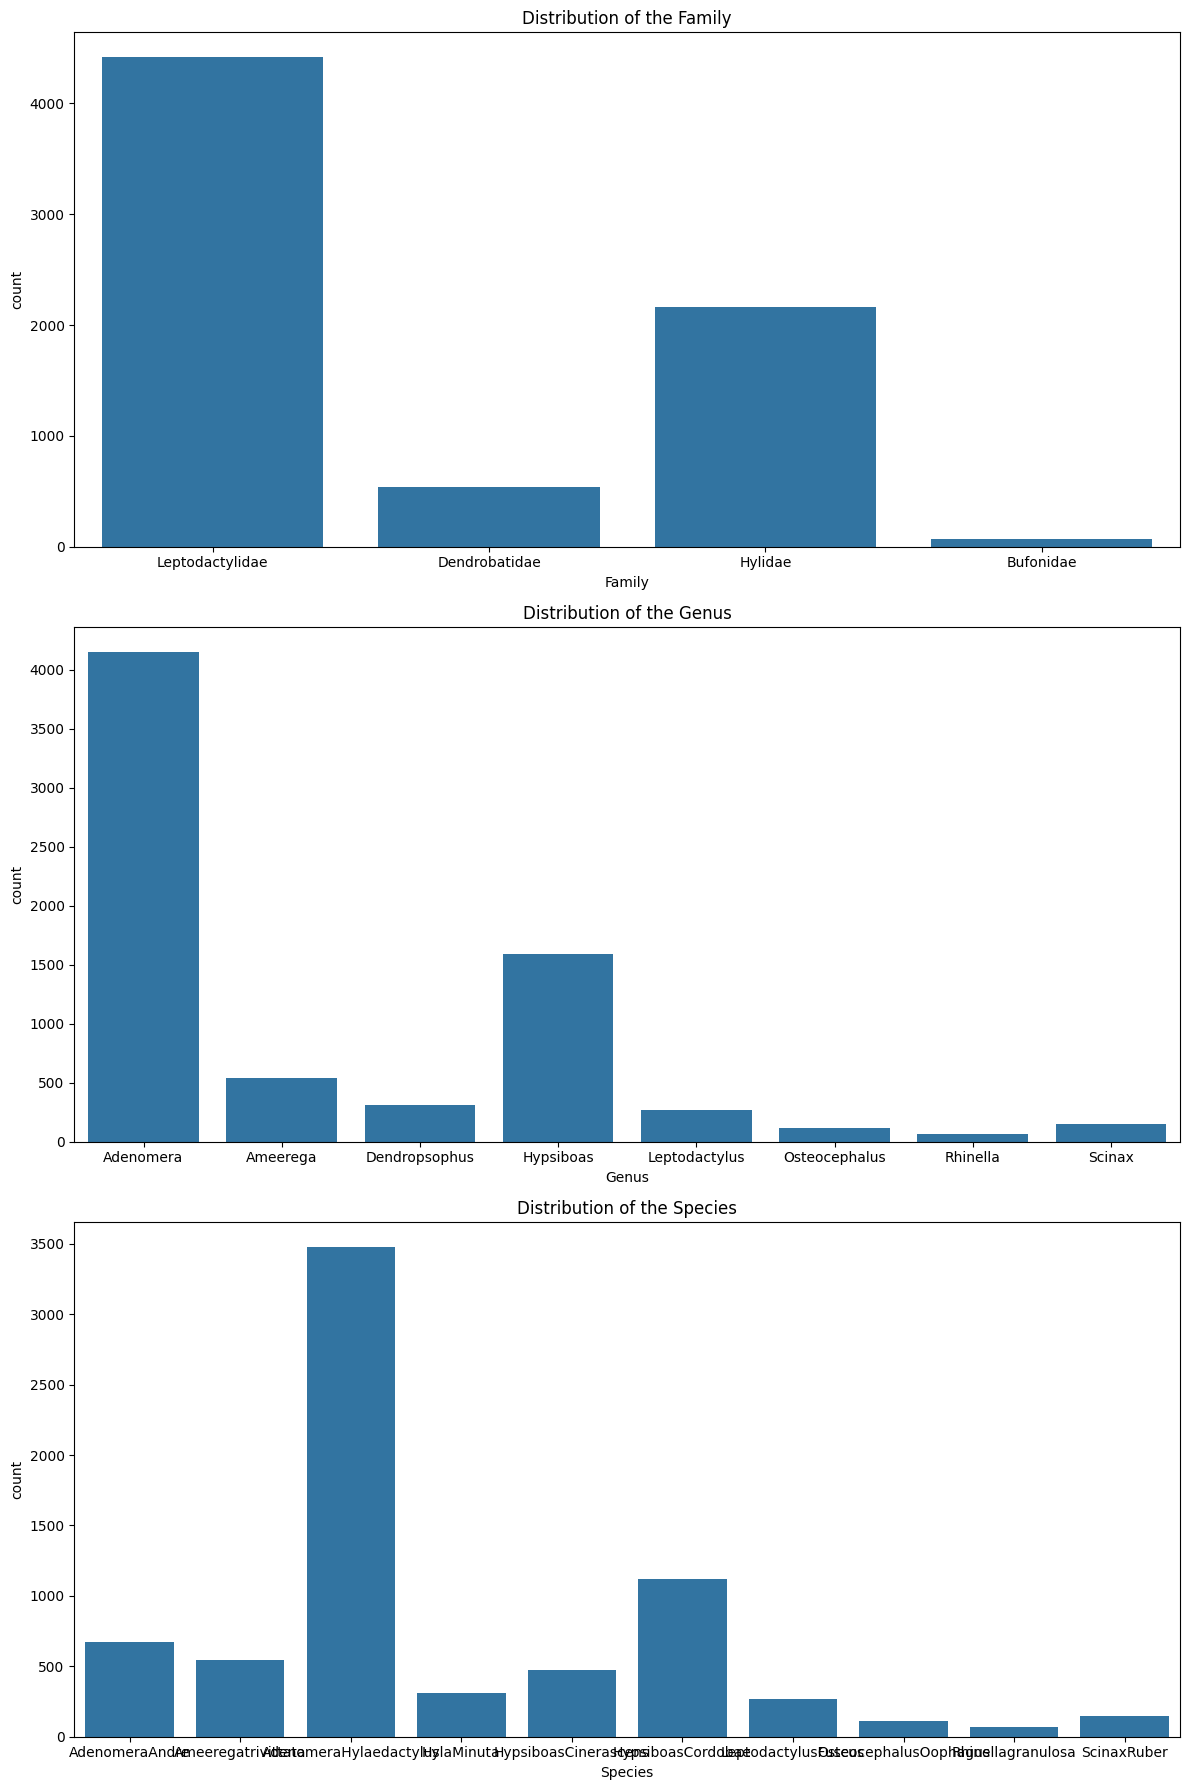

In [14]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-4]), columns=df.columns[:-4])
df_scaled['Family'] = df['Family']
df_scaled['Genus'] = df['Genus']
df_scaled['Species'] = df['Species']
df_scaled.head()


fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.countplot(ax=axes[0], x='Family', data=df_scaled)
axes[0].set_title('Distribution of the Family')

sns.countplot(ax=axes[1], x='Genus', data=df_scaled)
axes[1].set_title('Distribution of the Genus')

sns.countplot(ax=axes[2], x='Species', data=df_scaled)
axes[2].set_title('Distribution of the Species')

plt.tight_layout()
plt.show()

### Visualize feature distributions

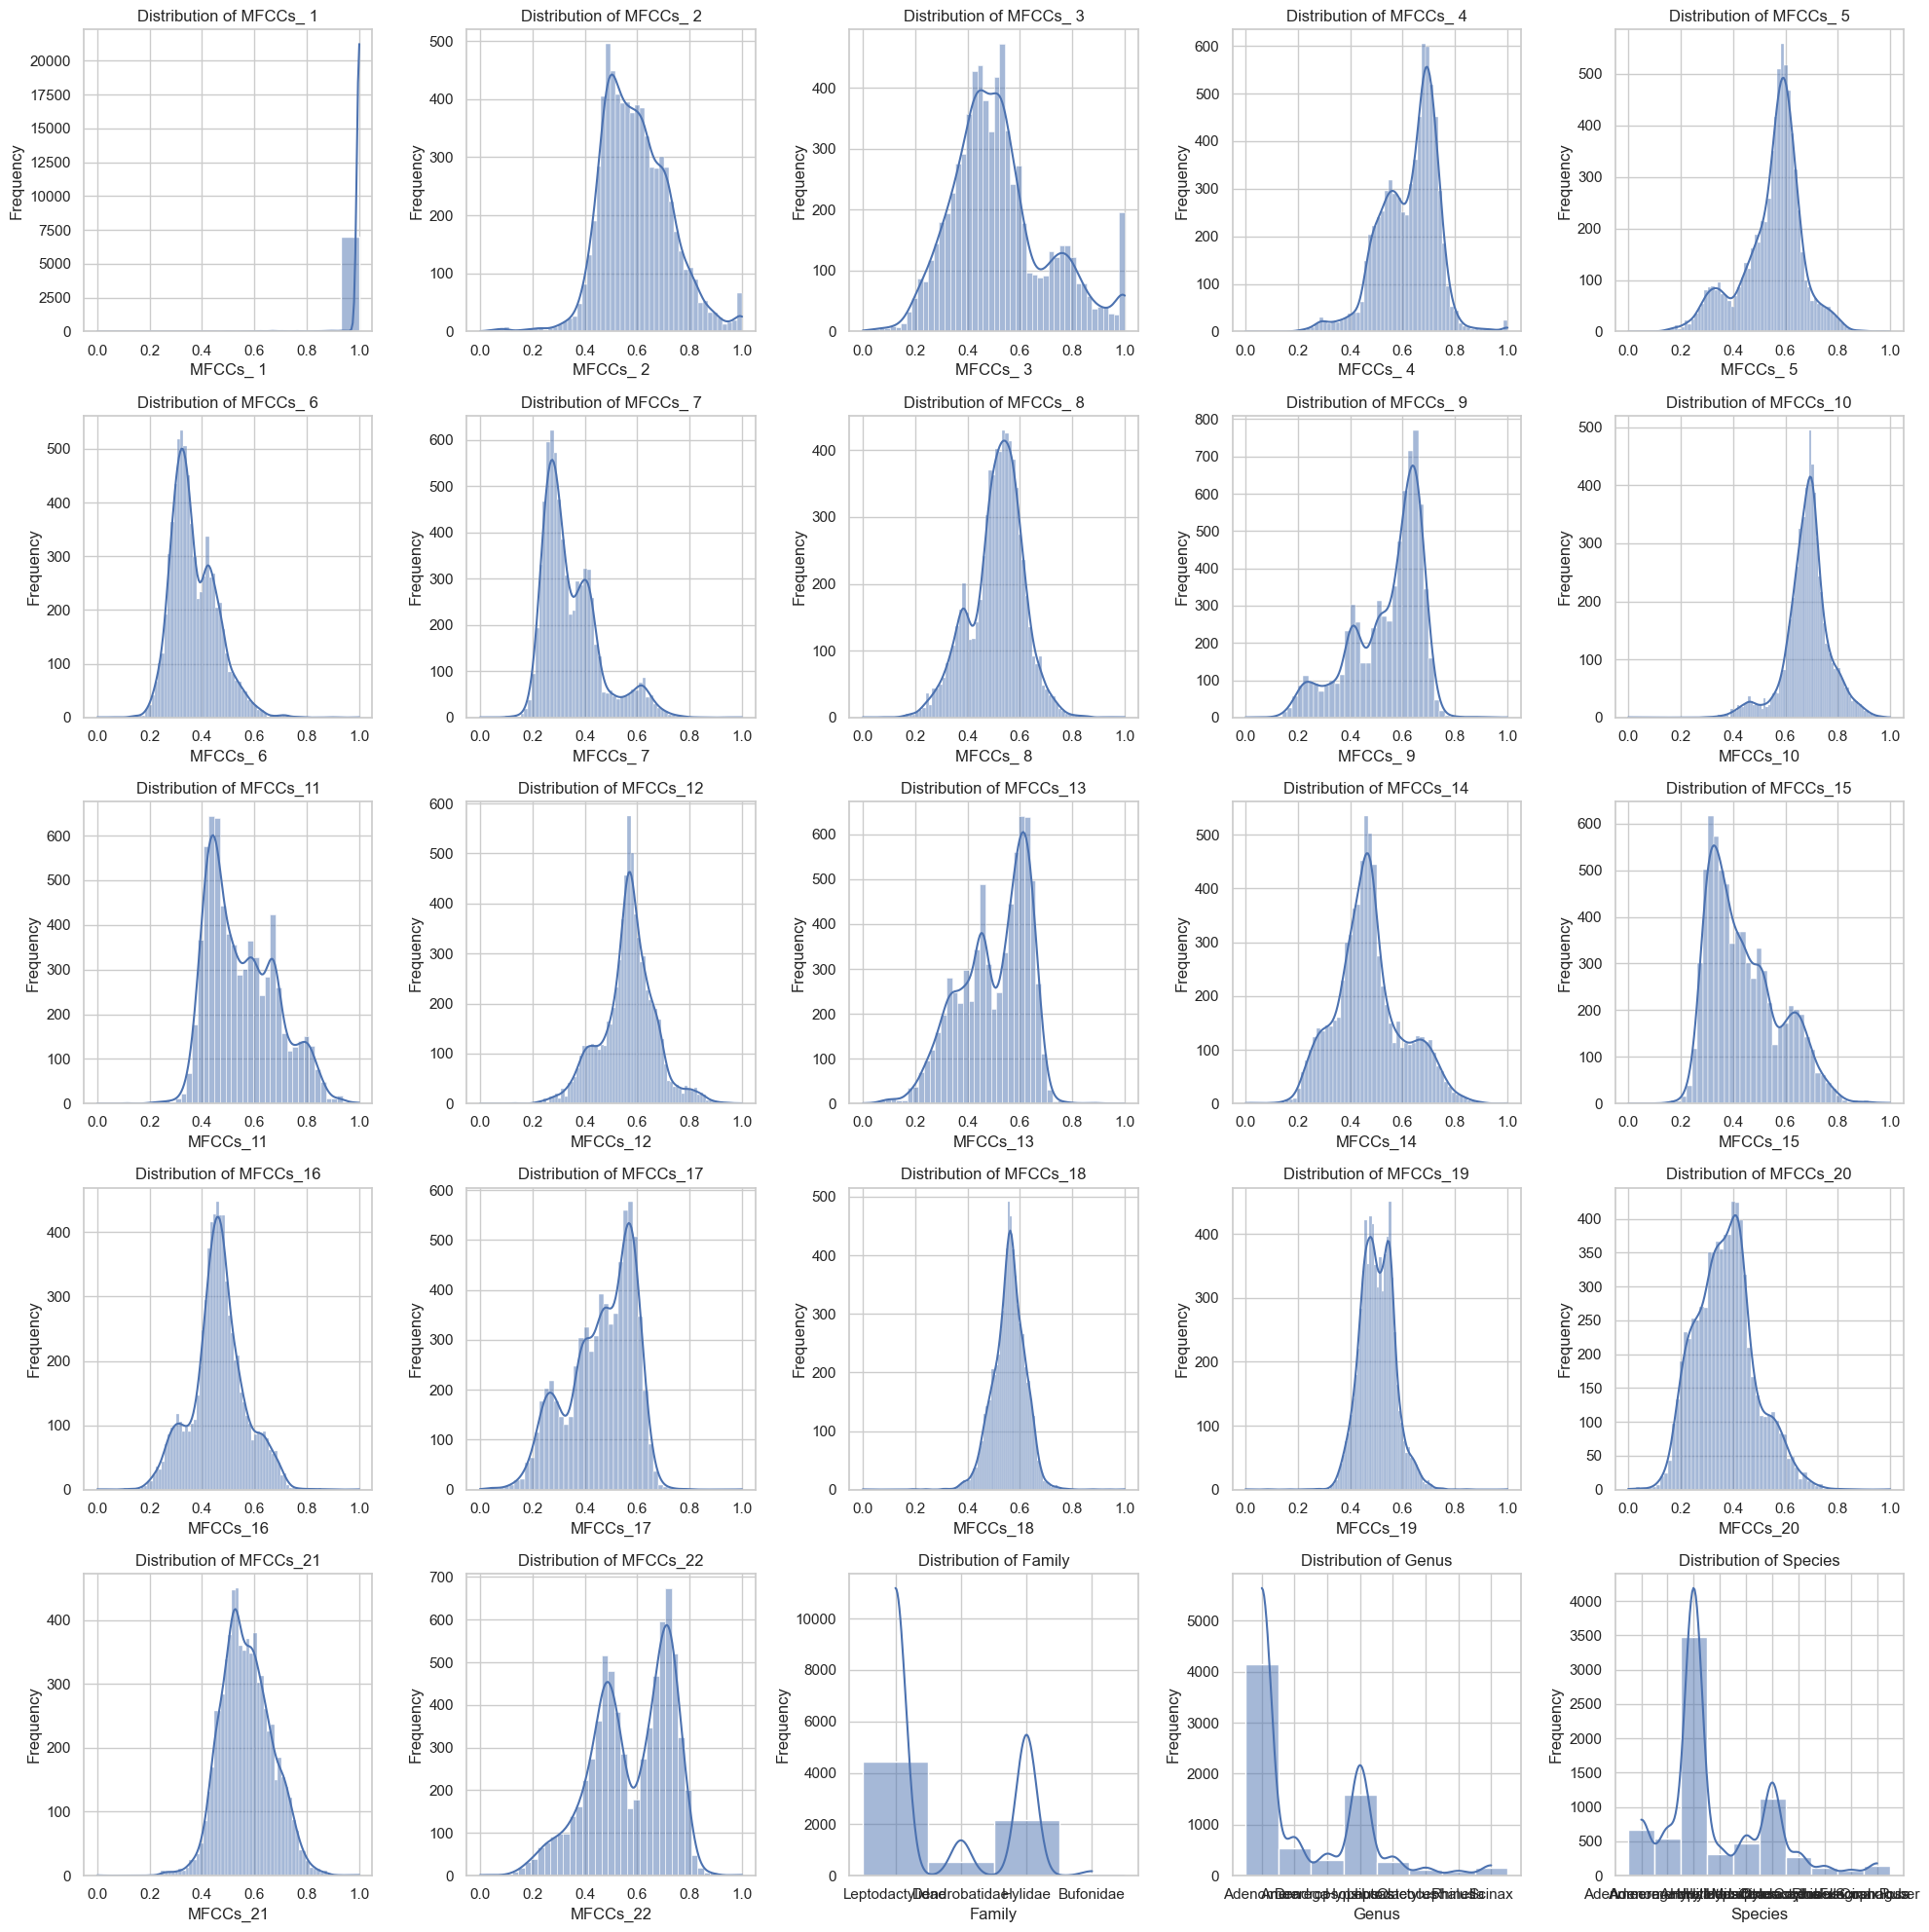

In [15]:
sns.set_theme(style="whitegrid")

num_features = len(df_scaled.columns)

num_cols = 5
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(df_scaled.columns):
    sns.histplot(df_scaled[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* checking for any correlation between different features using heatmap


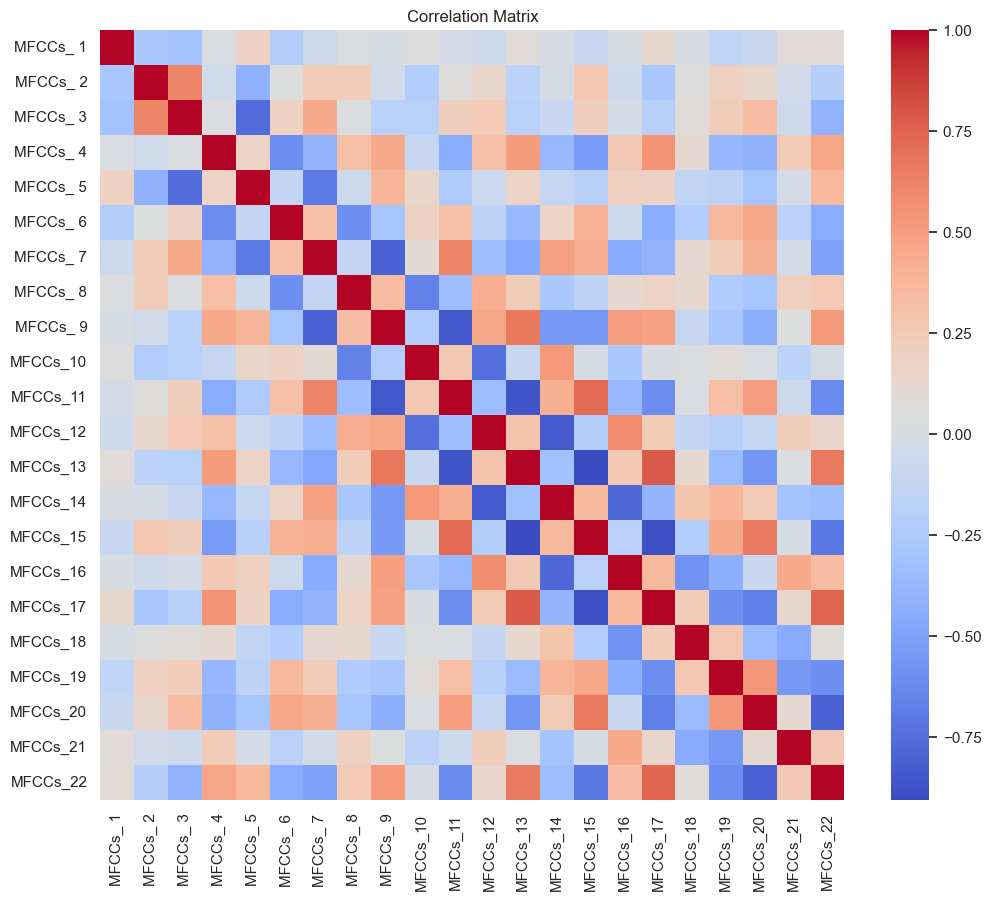

In [16]:
# Exclude non-numeric columns for correlation matrix calculation
numeric_df_scaled = df_scaled.select_dtypes(include=[np.number])
correlation_matrix = numeric_df_scaled.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


* **Visualizes the Distribution**
    * The boxplot shows the distribution of each feature, including the median, quartiles, and potential outliers.
* **Identifies Outliers**
    * Outliers are displayed as individual points outside the whiskers of the boxplot.
* **Compares Features**
    * By plotting all features in a single figure, we can easily compare their distributions and identify any features with significant outliers or skewness.


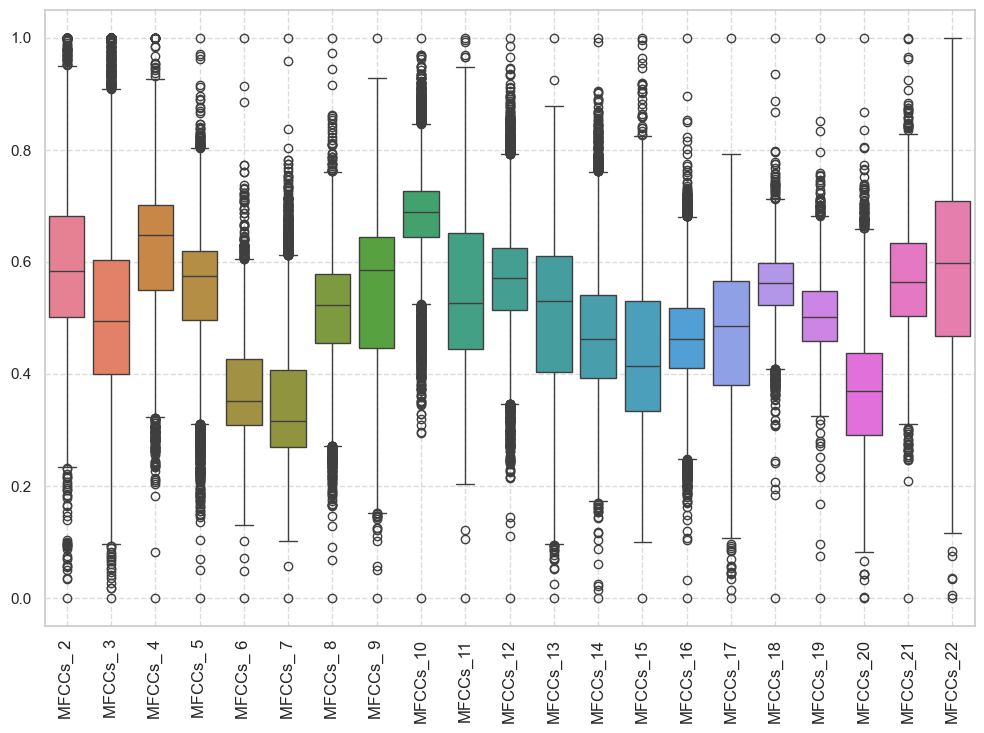

In [17]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_scaled.iloc[:, 1:])
plt.xticks(rotation=90, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Feature engineering

In [18]:
# Exclude non-numeric columns
numeric_df_scaled = df_scaled.select_dtypes(include=[np.number])

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(numeric_df_scaled)

poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numeric_df_scaled.columns))

poly_df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_19^2,MFCCs_19 MFCCs_20,MFCCs_19 MFCCs_21,MFCCs_19 MFCCs_22,MFCCs_20^2,MFCCs_20 MFCCs_21,MFCCs_20 MFCCs_22,MFCCs_21^2,MFCCs_21 MFCCs_22,MFCCs_22^2
0,1.0,0.493693,0.230108,0.457262,0.686625,0.488253,0.415812,0.377963,0.314020,0.730114,...,0.286035,0.270373,0.358125,0.259231,0.255568,0.338515,0.245036,0.448384,0.324565,0.234938
1,1.0,0.504810,0.234712,0.503234,0.702091,0.493774,0.389749,0.313783,0.286431,0.761439,...,0.264520,0.236726,0.321569,0.258808,0.211853,0.287781,0.231615,0.390921,0.314625,0.253220
2,1.0,0.493323,0.245855,0.515934,0.656957,0.436679,0.355882,0.296270,0.277784,0.803239,...,0.239395,0.198528,0.315960,0.275215,0.164637,0.262022,0.228233,0.417012,0.363236,0.316395
3,1.0,0.536404,0.386491,0.544660,0.726162,0.561174,0.360292,0.338713,0.369060,0.828890,...,0.192247,0.162217,0.220200,0.217881,0.136878,0.185804,0.183847,0.252218,0.249561,0.246933
4,1.0,0.454770,0.256042,0.529406,0.696509,0.479800,0.354693,0.275717,0.312834,0.826219,...,0.222676,0.187907,0.310191,0.266641,0.158568,0.261758,0.225008,0.432100,0.371435,0.319287


> notice 275 columns = 22(single) + 22C2(interaction) + 22(squared)

### Feature Correlation Analysis 
Removing highly correlated features from a clustering model is important because it can improve the model's performance and accuracy: 
* Reduces redundancy
    * When features are highly correlated, they provide similar information to the model, making it redundant to include all of them. 
* Improves generalization
    * Removing correlated features helps the model generalize to new data, reducing the risk of overfitting. 
* Stabilizes feature importance
    * Highly correlated features can make the importance of features in a model unstable. 
* Improves interpretability
    * Removing correlated features can improve the interpretability of the model.

> 0.9 or higher: Commonly used for high-dimensional data where even slight redundancy can impact the model. This threshold is stringent and only removes features that are very closely correlated.

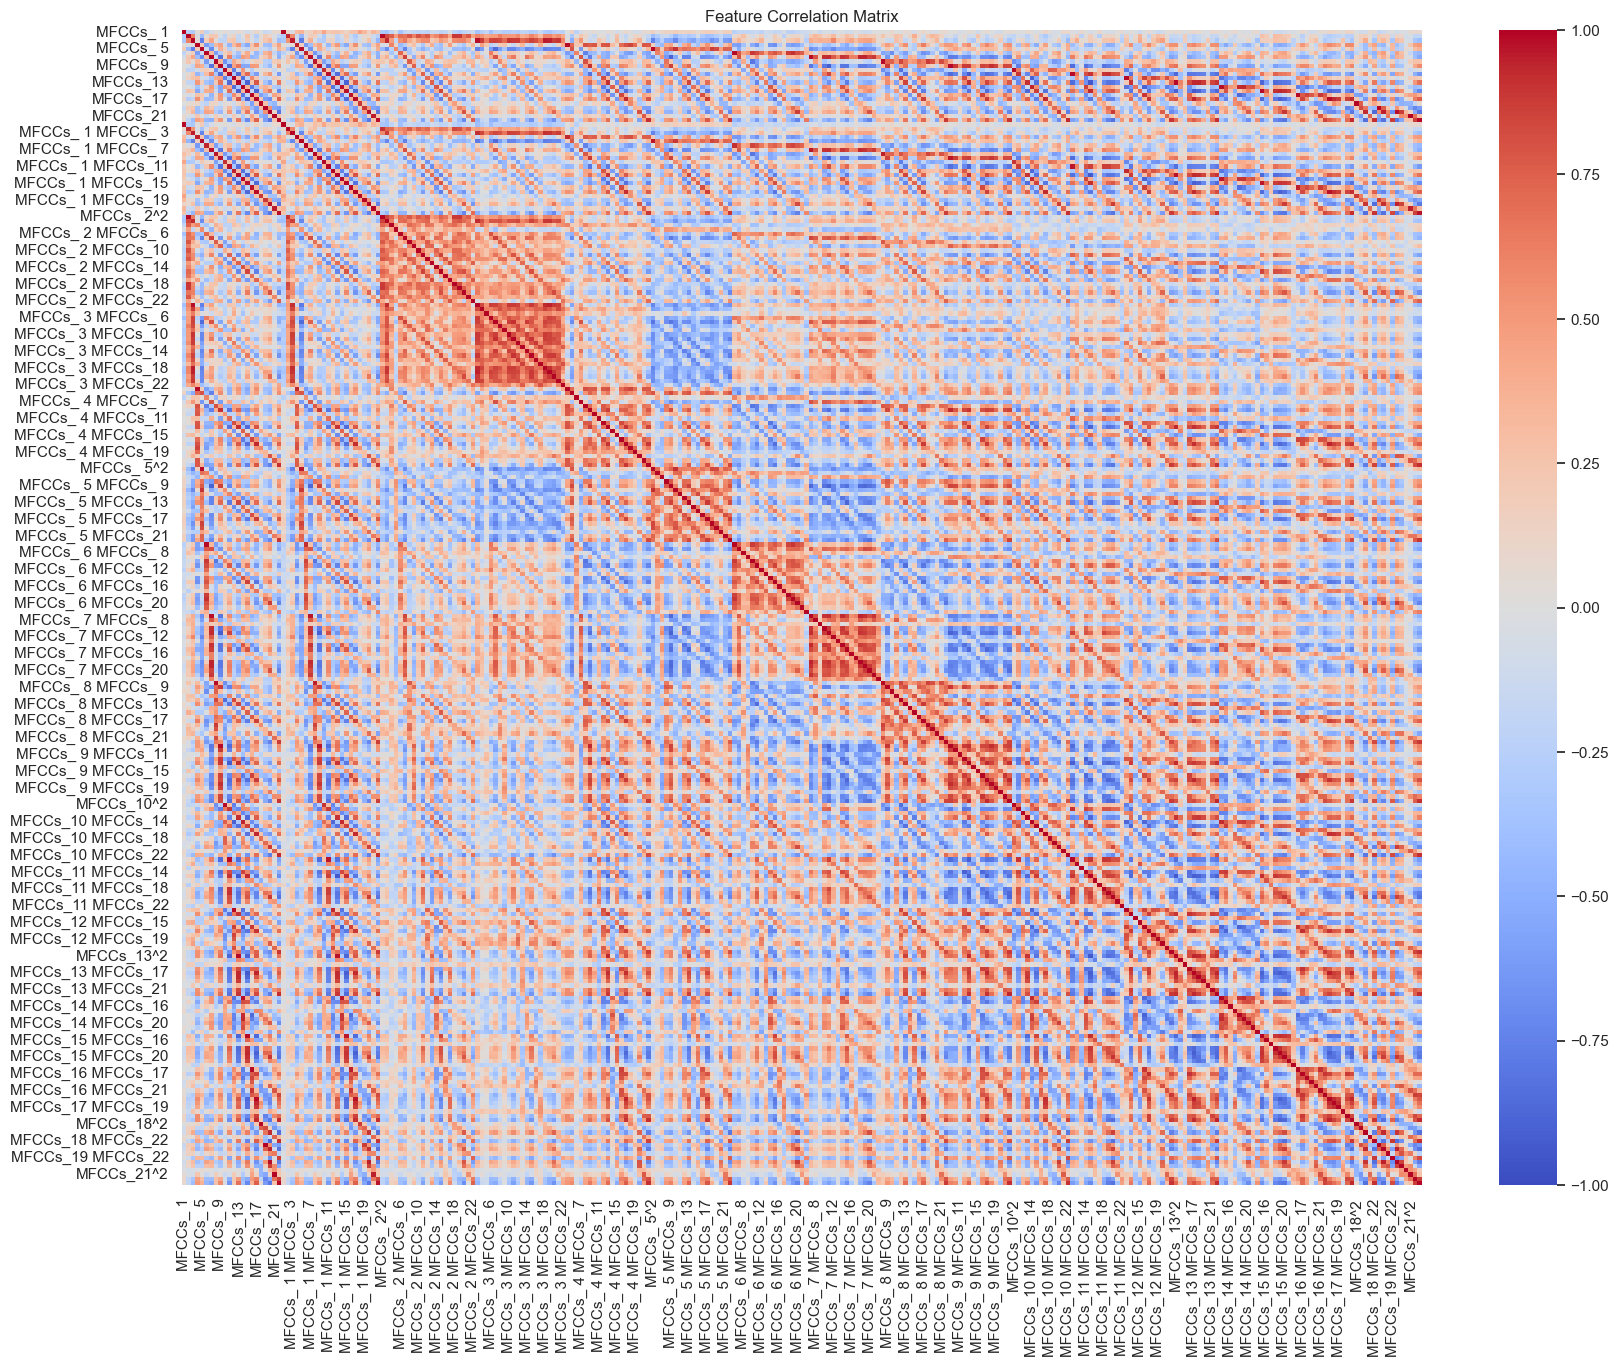

Removed features: ['MFCCs_ 1^2', 'MFCCs_ 1 MFCCs_ 2', 'MFCCs_ 1 MFCCs_ 3', 'MFCCs_ 1 MFCCs_ 4', 'MFCCs_ 1 MFCCs_ 5', 'MFCCs_ 1 MFCCs_ 6', 'MFCCs_ 1 MFCCs_ 7', 'MFCCs_ 1 MFCCs_ 8', 'MFCCs_ 1 MFCCs_ 9', 'MFCCs_ 1 MFCCs_10', 'MFCCs_ 1 MFCCs_11', 'MFCCs_ 1 MFCCs_12', 'MFCCs_ 1 MFCCs_13', 'MFCCs_ 1 MFCCs_14', 'MFCCs_ 1 MFCCs_15', 'MFCCs_ 1 MFCCs_16', 'MFCCs_ 1 MFCCs_17', 'MFCCs_ 1 MFCCs_20', 'MFCCs_ 1 MFCCs_21', 'MFCCs_ 1 MFCCs_22', 'MFCCs_ 2^2', 'MFCCs_ 2 MFCCs_ 3', 'MFCCs_ 3^2', 'MFCCs_ 3 MFCCs_10', 'MFCCs_ 3 MFCCs_11', 'MFCCs_ 3 MFCCs_15', 'MFCCs_ 3 MFCCs_18', 'MFCCs_ 3 MFCCs_19', 'MFCCs_ 4^2', 'MFCCs_ 4 MFCCs_ 9', 'MFCCs_ 4 MFCCs_13', 'MFCCs_ 4 MFCCs_17', 'MFCCs_ 4 MFCCs_22', 'MFCCs_ 5^2', 'MFCCs_ 5 MFCCs_10', 'MFCCs_ 6^2', 'MFCCs_ 6 MFCCs_19', 'MFCCs_ 7^2', 'MFCCs_ 7 MFCCs_10', 'MFCCs_ 7 MFCCs_11', 'MFCCs_ 7 MFCCs_14', 'MFCCs_ 7 MFCCs_18', 'MFCCs_ 7 MFCCs_19', 'MFCCs_ 7 MFCCs_21', 'MFCCs_ 8^2', 'MFCCs_ 9^2', 'MFCCs_ 9 MFCCs_13', 'MFCCs_ 9 MFCCs_17', 'MFCCs_ 9 MFCCs_18', 'MFCCs_ 9 MFCCs

In [19]:
corr_matrix = poly_df.corr()

# correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

# Identify and remove highly correlated features
correlation_threshold = 0.9
# Select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Finding features with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]

# Droping the highly correlated features
df_reduced = poly_df.drop(columns=to_drop)

print(f"Removed features: {to_drop}")
print("Shape before removing correlated features:", poly_df.shape)
print("Shape after removing correlated features:", df_reduced.shape)

## 2. K-Means Clustering

1. Elbow Method: 
    * Iterates over different cluster counts and tracks the inertia to find where adding clusters doesn’t significantly reduce the inertia. The “elbow” point in the plot suggests the optimal number.
2. Silhouette Score:
    * Measures how similar points within a cluster are to each other compared to points in other clusters. A higher silhouette score (closer to 1) indicates better-defined clusters.
3. Cluster Implementation: 
    * Assigns each point to a cluster based on the optimal k, and if the data is reducible, a PCA plot helps visualize the clusters.

### Elbow Method
* Iterates over different cluster counts and tracks the inertia to find where adding clusters doesn’t significantly reduce the inertia. 
* The “elbow” point in the plot suggests the optimal number.

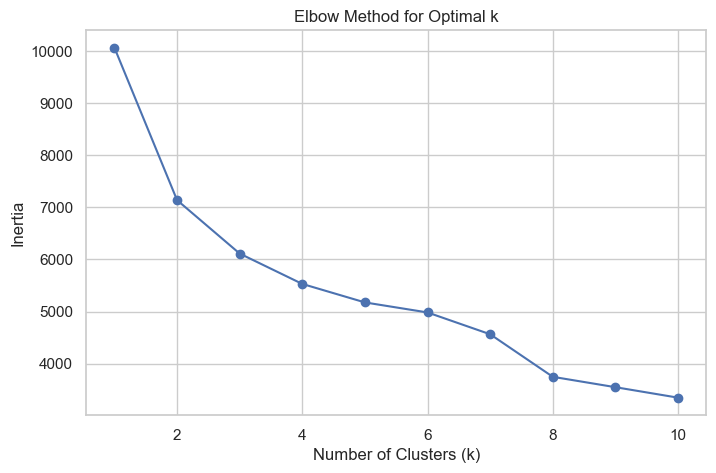

In [20]:
inertia = []
K_range = range(1, 11)  # Test between 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_reduced)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### Silhouette Score Evaluation
* Measures how similar points within a cluster are to each other compared to points in other clusters.
* A higher silhouette score (closer to 1) indicates better-defined clusters.

In [21]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_reduced)

sil_score = silhouette_score(df_reduced, cluster_labels)
print(f'Silhouette Score for k={optimal_k}:', sil_score)


Silhouette Score for k=3: 0.32833550361376934


### Cluster Implementation
Assigns each point to a cluster based on the optimal k, and if the data is reducible, a PCA plot helps visualize the clusters.

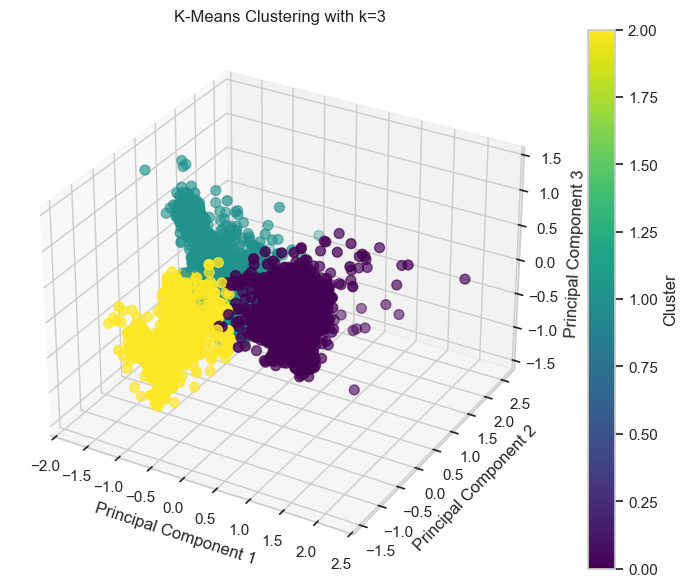

In [22]:
df_reduced['Cluster'] = cluster_labels
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df_reduced.drop('Cluster', axis=1))

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_reduced['Cluster'] = kmeans.fit_predict(df_reduced.drop('Cluster', axis=1))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=cluster_labels, cmap='viridis', s=50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.colorbar(sc, label='Cluster')
plt.show()

### Cluster Initialization 
1. Random Initialization
* Description: The cluster centroids are initialized randomly from the data points.

2. k-means++
* Description: k-means++ improves on random initialization by choosing initial centroids in a way that maximizes the distance between them. Specifically:
    * The first centroid is chosen randomly.
    * Each subsequent centroid is chosen based on a probability proportional to its squared distance from the nearest existing centroid.

In [23]:
# Random initialization
kmeans_random = KMeans(n_clusters=k, init='random', random_state=42)
kmeans_random.fit(df_reduced)
print(f"Inertia with random initialization: {kmeans_random.inertia_}")

# k-means++ initialization
kmeans_plus = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_plus.fit(df_reduced)
print(f"Inertia with k-means++ initialization: {kmeans_plus.inertia_}")


Inertia with random initialization: 3426.821386996795
Inertia with k-means++ initialization: 3527.934881588164


## 3.Cluster Visualization
After reducing dimensions, plot the clusters using a 2D scatter plot, coloring each point by its assigned cluster label.

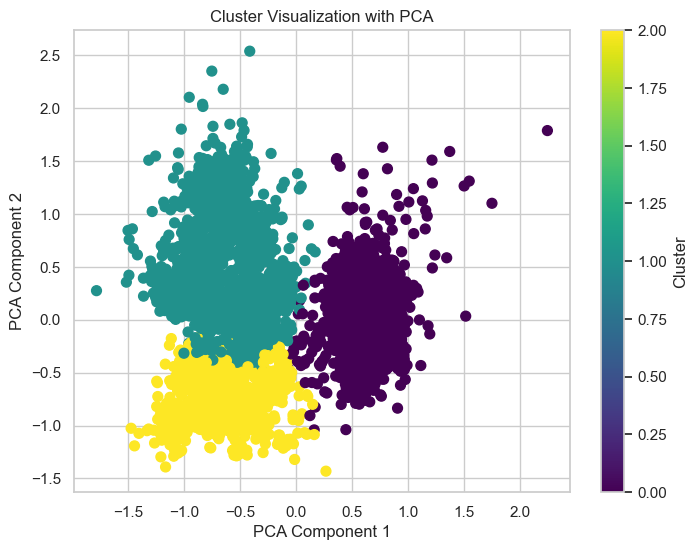

In [24]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_reduced.drop(columns=['Cluster']))
title = 'PCA'

# Create a scatter plot of the reduced data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_reduced['Cluster'], cmap='viridis', s=50)
plt.xlabel(f'{title} Component 1')
plt.ylabel(f'{title} Component 2')
plt.title(f'Cluster Visualization with {title}')
plt.colorbar(scatter, label='Cluster')
plt.show()


### Feature Contribution to Clustering 

* **Loadings**: `pca.components_` contains the PCA loadings (contributions) of each feature to the principal components.
* **Contribution** Calculation: We combine the absolute contributions to both PC1 and PC2 to determine which features contribute most to variance.
* **Visualization**: A bar plot displays the top contributing MFCC features, helping to identify which features are most responsible for separating clusters.


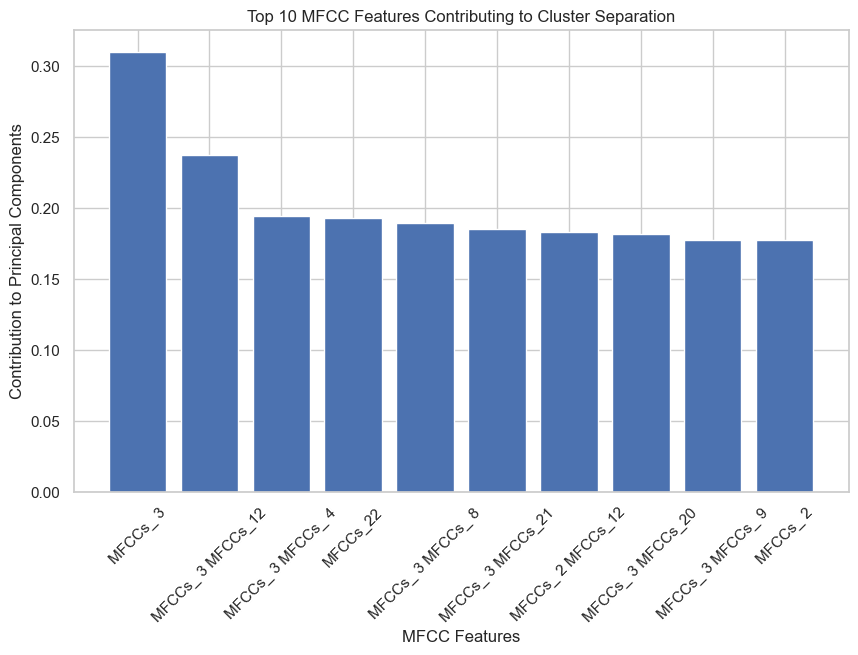

In [25]:
# 1: Fit PCA
pca = PCA(n_components=2)
pca.fit(df_reduced.drop(columns=['Cluster']))

# 2: Extract PCA Loadings
loadings = pd.DataFrame(pca.components_.T, index=df_reduced.columns[:-1], columns=['PC1', 'PC2'])
loadings['Contribution'] = np.sqrt(loadings['PC1']**2 + loadings['PC2']**2)
loadings = loadings.sort_values(by='Contribution', ascending=False)

# 3: Visualize Contributions
plt.figure(figsize=(10, 6))
plt.bar(loadings.index[:10], loadings['Contribution'][:10])
plt.xticks(rotation=45)
plt.xlabel('MFCC Features')
plt.ylabel('Contribution to Principal Components')
plt.title('Top 10 MFCC Features Contributing to Cluster Separation')
plt.show()


## 4. Cluster Evaluation Metrics 

* Davies-Bouldin Index: 
    * Measures the average similarity ratio of each cluster with the cluster that is most similar to it.
    * A **lower** Davies-Bouldin Index indicates better clustering, as clusters are more compact and separated.

* Calinski-Harabasz Index: 
    * Also known as the Variance Ratio Criterion, this metric calculates the ratio of the sum of between-cluster dispersion to within-cluster dispersion. 
    * A **higher** Calinski-Harabasz Index indicates better clustering.

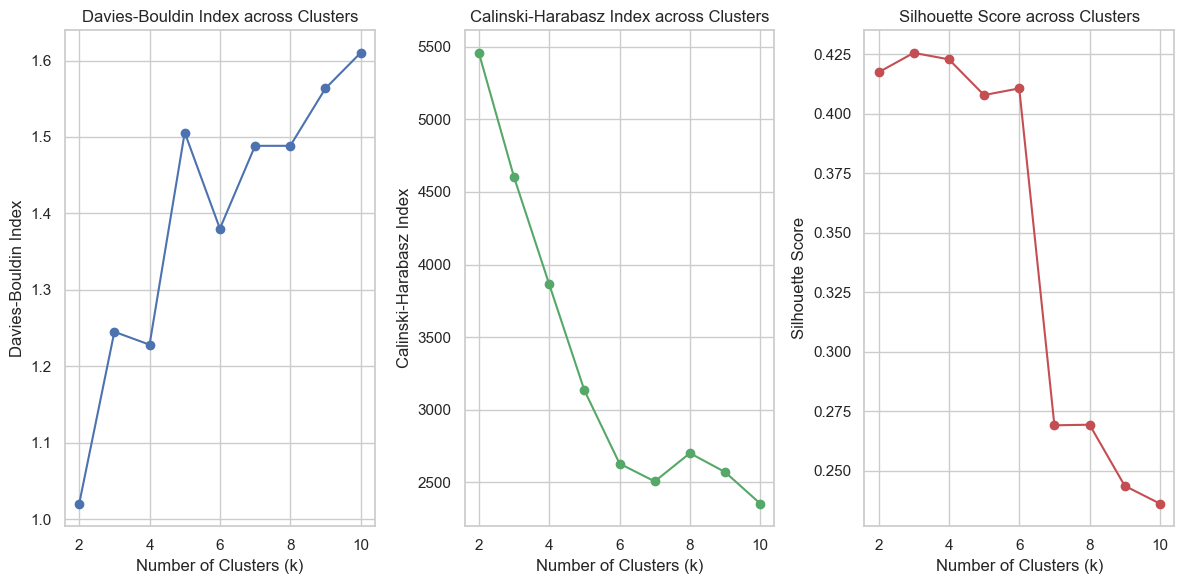

In [26]:
# Define the range of clusters to evaluate
cluster_range = range(2, 11)  # Avoid 1 cluster as it is trivial

# Initialize lists to store metric values for each k
davies_bouldin_scores = []
calinski_harabasz_scores = []
silhouette_scores = []  # Optional, if you want to compare with silhouette scores

for k in cluster_range:
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df_reduced)
    
    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(df_reduced, cluster_labels)
    davies_bouldin_scores.append(db_index)
    
    # Calculate Calinski-Harabasz Index
    ch_index = calinski_harabasz_score(df_reduced, cluster_labels)
    calinski_harabasz_scores.append(ch_index)
    
    # Optional: Calculate silhouette score for comparison
    sil_score = silhouette_score(df_reduced, cluster_labels)
    silhouette_scores.append(sil_score)

# Plot the metrics for comparison
plt.figure(figsize=(12, 6))

# Plot Davies-Bouldin Index
plt.subplot(1, 3, 1)
plt.plot(cluster_range, davies_bouldin_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index across Clusters')

# Plot Calinski-Harabasz Index
plt.subplot(1, 3, 2)
plt.plot(cluster_range, calinski_harabasz_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index across Clusters')

# Plot Silhouette Score (if included)
plt.subplot(1, 3, 3)
plt.plot(cluster_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score across Clusters')

plt.tight_layout()
plt.show()


## 5. Comparison with Other Clustering Algorithms 

### Agglomerative clustering
* Agglomerative clustering groups data points by merging the closest clusters iteratively, using a linkage criterion (e.g., "ward" for minimizing variance)

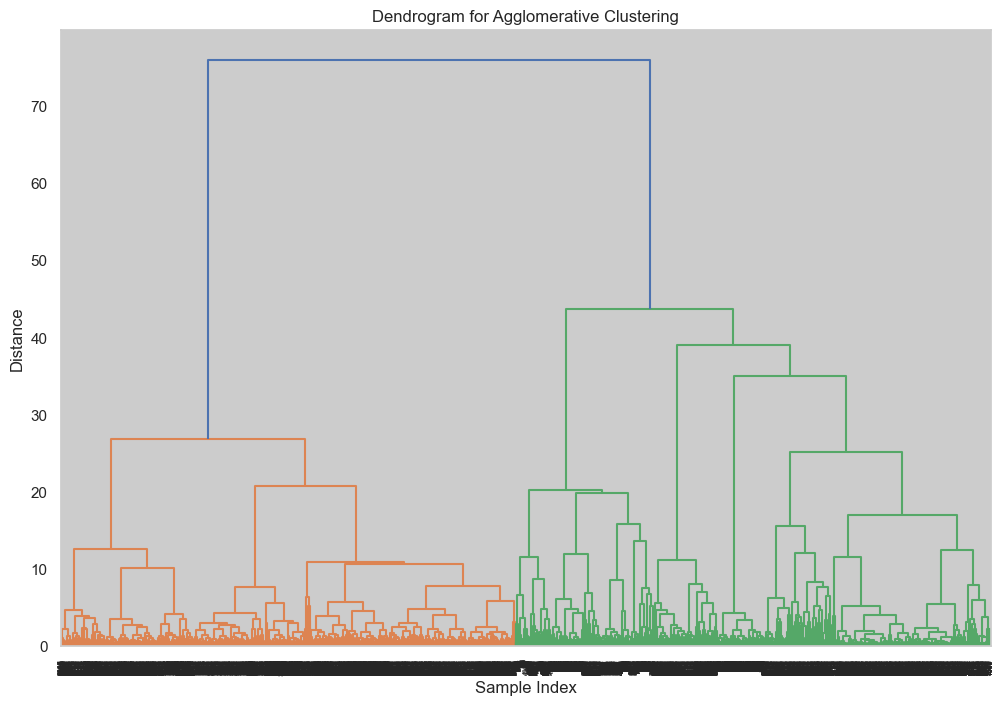

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
Z = linkage(df_reduced.drop(columns=['Cluster']), method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


### DBSCAN
* DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clusters based on density and can identify clusters of arbitrary shapes, marking outliers as noise.

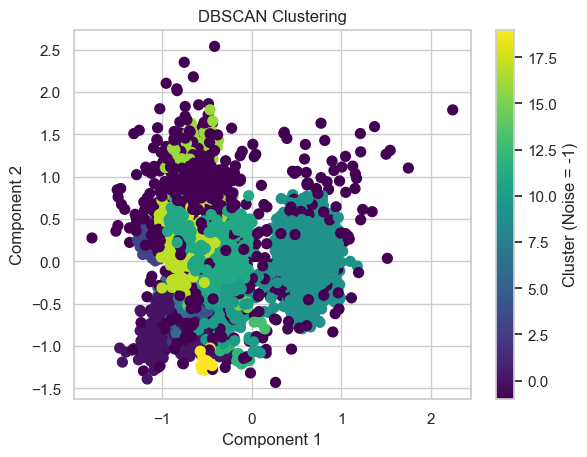

In [28]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN (parameters require tuning based on data characteristics)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_reduced)

# Visualizing DBSCAN Clustering results with PCA-reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster (Noise = -1)')
plt.show()


### Algorithm Comparison and Analysis

1. K-Means
* Strengths:
    * Suitable for large datasets.
    * Efficient and interpretable when clusters are spherical and evenly distributed.
    * Performs well when the number of clusters is predefined and data is relatively well-separated.
* Weaknesses:
    * Sensitive to outliers, as every point is assigned to a cluster.
    * May fail to capture complex cluster shapes (e.g., non-spherical clusters).
2. Agglomerative Hierarchical Clustering
* Strengths:
    * Does not require a pre-defined number of clusters.
    * Can capture complex hierarchical relationships and cluster shapes.
    * Suitable for smaller datasets where hierarchical relationships are insightful.
* Weaknesses:
    * Not scalable for very large datasets (high memory and computational demands).
    * Results are sensitive to linkage criteria and can produce different structures based on chosen linkage (e.g., “ward,” “complete,” “average”).
3. DBSCAN
* Strengths:
    * Effective for identifying clusters of arbitrary shapes, even in the presence of noise.
    * Outliers are naturally marked as noise, making it more robust to noise.
* Weaknesses:
    * Requires tuning of eps and min_samples, which may be challenging.
    * Not ideal for clusters with varying densities, as it may struggle to distinguish dense areas from larger, sparser clusters.
    * May perform poorly if the dataset has high dimensionality or the optimal cluster separation is unclear.

## 6. Analysis and Report

### Clustering Process Summary
* Data Preprocessing and Exploration:
    * The dataset was loaded, and essential libraries were imported.
    * Initial exploration included examining data distributions and scaling features using techniques like MinMaxScaler, helping prepare the dataset for clustering.
* Optimal Number of Clusters:
    * The Elbow Method and silhouette analysis were employed to determine the ideal cluster count. 
    * This process aimed to balance cluster compactness and separation quality.
* Clustering Evaluation:
    * Metrics such as silhouette score, Davies-Bouldin Index, and Calinski-Harabasz Index were applied to evaluate clustering quality.
    * Silhouette Score: This metric helped in assessing how well-separated and compact the clusters were.
    * Davies-Bouldin Index and Calinski-Harabasz Index: Provided additional insights into inter-cluster distances and the ratio of within-cluster to between-cluster dispersion.

### Insights from Visualizations
Dimensionality reduction techniques, PCA, were likely used for visualizing clusters in 2D space, providing clarity on how well-separated the clusters appeared based on the chosen features.

### Limitations of K-Means and Other Clustering Algorithms
* K-Means:
    * Strengths: Efficient and effective when clusters are spherical and evenly distributed. It’s also computationally scalable.
    * Limitations: Sensitive to outliers and assumes clusters are spherical, which might not suit the real structure of this dataset. K-Means also requires specifying the number of clusters beforehand, which might not always align with natural groupings.
* Agglomerative Hierarchical Clustering:
    * Strengths: Does not require a predefined cluster count and can reveal hierarchical relationships.
    * Limitations: High computational demand makes it less suitable for large datasets, and the outcome can vary based on the chosen linkage method.
* DBSCAN:
    * Strengths: Can identify clusters of arbitrary shapes and is robust against outliers, labeling sparse data points as noise.
    * Limitations: Parameter sensitivity (eps and min_samples) and difficulty handling clusters of varying density can limit DBSCAN’s performance, especially in higher dimensions